In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Exercise 31
## a)

In [97]:
data_a = pd.read_csv('ex_a.csv')

#data_a.columns
x = data_a['x'].values
y = data_a[' "y_0"'].values #warum macht man da ein Leerzeichen vor den Namen???!!!???!!!???!!!???!!!???!!!


def poly(n,x):
    return x**n

def poly6(x, a):
    return a[0] + a[1]*x + a[2]*x**2 + a[3]*x**3 + a[4]*x**4 + a[5]*x**5 + a[6]*x**6


# design matrix
A = np.array([poly(0,x), poly(1,x), poly(2,x), poly(3,x), poly(4,x), poly(5,x), poly(6,x)]).T

a = (np.linalg.inv(A.T@A)@A.T)@y

print('Coefficents: ', a)

Coefficents:  [ 2.50619533e-01 -5.78875871e-01  7.03767007e-01 -3.37061731e-01
  7.69042416e-02 -8.41974710e-03  3.55422916e-04]


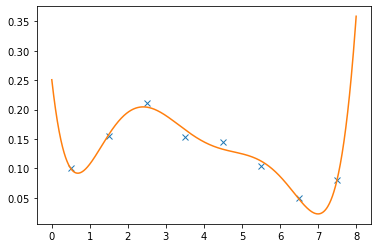

In [95]:
fig = plt.figure()

xx = np.linspace(0,8,1000)

ax = fig.add_subplot(1,1,1)
ax.plot(x,y,'x')
ax.plot(xx, poly6(xx,a))